# 5.1

In [1]:
import scipy.stats
import numpy as np



In [2]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [3]:
#dist.mean(), dist.std() #we enter this

(178.0, 7.7)

In [4]:
dist.cdf(mu-sigma)


0.1586552539314574

In [5]:
#dist.cdf(178.0-7.7)

0.1586552539314574

In [6]:
# 5 10 = 177.8
dist.cdf(177.8)
# 5 11 = 180.34 
#dist.cdf(180.34)



0.48963902786483265

In [7]:
# 6 1 = 185.42
dist.cdf(185.42)


0.8323858654963063

In [8]:
range_blueMan =  (dist.cdf(185.42) - dist.cdf(177.8) )
range_blueMan

0.3427468376314737

34% percent of the population fit the hieght, and 66% can't be in blue man group due the hieght restricton. 

# 5.2

In [9]:
from __future__ import print_function, division

%matplotlib inline




import thinkstats2
import thinkplot

In [10]:
alpha = 1.7
xmin = 1       # meter
distPar = scipy.stats.pareto(b=alpha, scale=xmin)
distPar.median()

1.5034066538560549

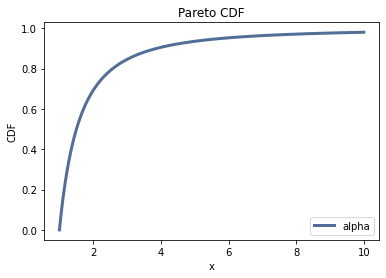

In [11]:
for alpha in [alpha]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 1, 10.0, n=10000) 
    thinkplot.Plot(xs, ps, label= "alpha")
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

In [12]:
distPar.mean()

2.428571428571429

In [13]:
distPar.cdf(10000000000000000000)


1.0

If I think this is cdf rank I need to add 10 zeros to get top rank, no one is that tell

Tmhe tallest person by the pareto would be 1000000000000

How many are taller than the mean height, I don't think someone will be 1km m

In [14]:
(1 - distPar.cdf(2.43))* 7000000000
#distPar.Value(1)

1547274523.9812176

In [15]:
distPar.cdf(2.43)

0.7789607822883975

# 6.1

In [16]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [17]:
def Mean(xs):
    return RawMoment(xs, 1)

In [18]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [19]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [20]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [21]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

In [22]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [23]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [24]:
import hinc
income_df = hinc.ReadData()

In [25]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

In [26]:
sample = np.power(10, log_sample)

Use book functions

In [27]:
Mean(sample)

74278.70753118733

In [28]:
Median(sample)

51226.45447894046

In [29]:
Skewness(sample)

4.949920244429583

In [30]:
PearsonMedianSkewness(sample)

0.7361258019141782

In [31]:
cdfPerson = thinkstats2.Cdf(sample)

In [32]:
#print(cdfPerson)

{'xscale': 'linear', 'yscale': 'linear'}

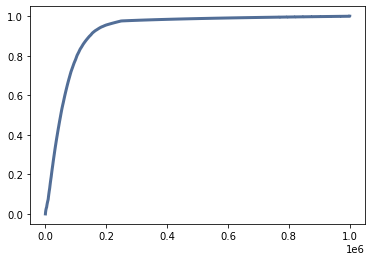

In [33]:
thinkplot.Cdf(cdfPerson)

In [34]:
#help(thinkstats2.Cdf)

In [35]:
cdfPerson.Prob(Mean(sample))

0.660005879566872

About 66% make below the average salary

In [37]:
#cdfPerson.Prob(min(sample))

8.166065099870975e-06

From the graph it looks your in the top %1 estimate at 300,000. If reading it right, the line length for the upper %1 look longer than where the average would be at 0.66, showint the wealth is shared more by the top 1%